In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
root_dir = "content/gdrive/My Drive"
base_dir = root_dir + 'apresentacao/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai.metrics import *

![alt text](https://miro.medium.com/proxy/0*At0wJRULTXvyA3EK.png)

ehajehaejkahdslfjahldfkahf

![alt text](https://miro.medium.com/max/1095/1*jYKYXkfI4iaE6qg-dEUEcQ.jpeg)

![alt text](https://miro.medium.com/max/581/1*zY1qFB9aFfZz66YxxoI2aw.gif)

![alt text](https://miro.medium.com/max/1649/1*UDgDe_-GMs4QQbT8UopoGA.png)

In [ ]:
path = untar_data(URLs.MNIST, dest = root_dir + base_dir)
path.ls()

[PosixPath('content/gdrive/My Drivecontent/gdrive/My Drive/apresentacao/mnist_png/testing'),
 PosixPath('content/gdrive/My Drivecontent/gdrive/My Drive/apresentacao/mnist_png/training')]

In [ ]:
dados = path/'training'

In [ ]:
dados.ls()

[PosixPath('content/gdrive/My Drivecontent/gdrive/My Drive/apresentacao/mnist_png/training/2'),
 PosixPath('content/gdrive/My Drivecontent/gdrive/My Drive/apresentacao/mnist_png/training/8'),
 PosixPath('content/gdrive/My Drivecontent/gdrive/My Drive/apresentacao/mnist_png/training/7'),
 PosixPath('content/gdrive/My Drivecontent/gdrive/My Drive/apresentacao/mnist_png/training/9'),
 PosixPath('content/gdrive/My Drivecontent/gdrive/My Drive/apresentacao/mnist_png/training/6'),
 PosixPath('content/gdrive/My Drivecontent/gdrive/My Drive/apresentacao/mnist_png/training/3'),
 PosixPath('content/gdrive/My Drivecontent/gdrive/My Drive/apresentacao/mnist_png/training/1'),
 PosixPath('content/gdrive/My Drivecontent/gdrive/My Drive/apresentacao/mnist_png/training/0'),
 PosixPath('content/gdrive/My Drivecontent/gdrive/My Drive/apresentacao/mnist_png/training/4'),
 PosixPath('content/gdrive/My Drivecontent/gdrive/My Drive/apresentacao/mnist_png/training/5')]

In [ ]:
(path/'training/0').ls()[1:5]

[PosixPath('content/gdrive/My Drivecontent/gdrive/My Drive/apresentacao/mnist_png/training/0/20244.png'),
 PosixPath('content/gdrive/My Drivecontent/gdrive/My Drive/apresentacao/mnist_png/training/0/13459.png'),
 PosixPath('content/gdrive/My Drivecontent/gdrive/My Drive/apresentacao/mnist_png/training/0/49713.png'),
 PosixPath('content/gdrive/My Drivecontent/gdrive/My Drive/apresentacao/mnist_png/training/0/58360.png')]

In [ ]:
ds_tfms = get_transforms(do_flip = False)
data = ImageDataBunch.from_folder(path, ds_tfms = ds_tfms, size = 28)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:451: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:454: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


IndexError: ignored

In [ ]:
data

ImageDataBunch;

Train: LabelList (60000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
2,2,2,2,2
Path: content/gdrive/My Drivecontent/gdrive/My Drive/apresentacao/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
2,2,2,2,2
Path: content/gdrive/My Drivecontent/gdrive/My Drive/apresentacao/mnist_png;

Test: None

In [ ]:
doc(ImageDataBunch)

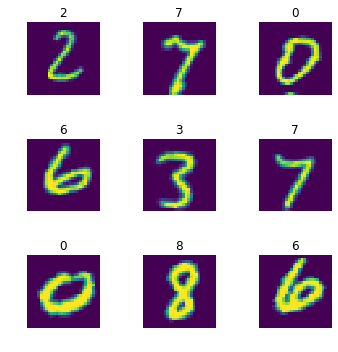

In [ ]:
data.show_batch(rows = 3, figsize = (5, 5))

In [ ]:
data = (ImageList.from_folder(path, convert_mode='L')
        .split_by_folder(train='training', valid='testing')
        .label_from_folder()
        .transform(tfms=ds_tfms, size=28)
        .databunch())

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
10


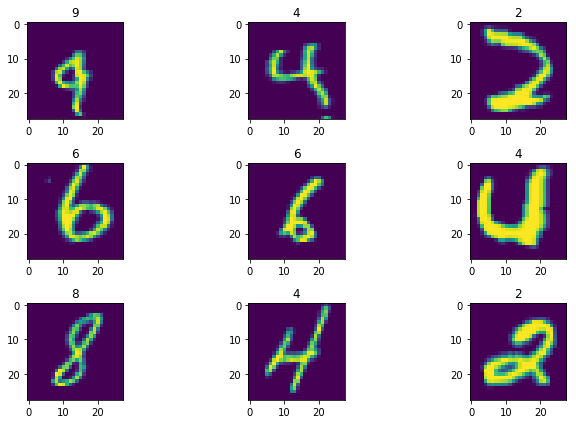

In [ ]:
print(data.classes)
print(data.c)
data.show_batch(rows=3, figsize=(10,6), hide_axis=False)

In [ ]:
class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(784, 512, bias=True)
        self.lin2 = nn.Linear(512, 256, bias=True)
        self.lin3 = nn.Linear(256, 10, bias=True)

    def forward(self, xb):
        x = xb.view(-1,784)
        x = F.relu(self.lin1(x))
        x = F.relu(self.lin2(x))
        return self.lin3(x)

In [ ]:
drnn_learner = Learner(data=data, model=Mnist_NN(), loss_func=nn.CrossEntropyLoss(),metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


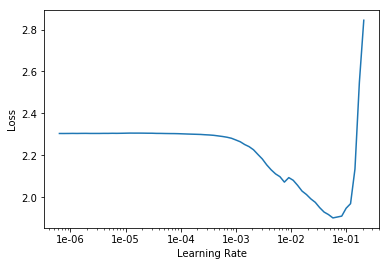

In [ ]:
drnn_learner.lr_find()
drnn_learner.recorder.plot()

In [ ]:
drnn_learner.fit_one_cycle(5,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.302569,0.159651,0.950400,01:30
1,0.271174,0.135801,0.959100,01:30
2,0.178389,0.098173,0.971200,01:29
3,0.117647,0.061972,0.980100,01:29
4,0.109071,0.055379,0.983200,01:29


In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2(x))

In [ ]:
class net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [ ]:
cnn_learn = cnn_learner(data, base_arch = Net, metrics = accuracy)

In [ ]:
data_cnn = ImageDataBunch.from_folder(path)
learner_cnn = cnn_learner(data_cnn, models.resnet18, metrics=[accuracy])
learner.fit_one_cycle(1,1e-3)

epoch,train_loss,valid_loss,accuracy,time


RuntimeError: ignored

In [ ]:
path = untar_data(URLs.MNIST)
data = ImageDataBunch.from_folder(path)


In [ ]:
learner = cnn_learner(data, base_arch = net, metrics=[accuracy])
learner.fit_one_cycle(2,1e-3)


epoch,train_loss,valid_loss,accuracy,time
0,0.137859,0.054261,0.981354,00:09
1,0.059811,0.038238,0.986752,00:10
